# Perform And Implement Image Compression Using Auto Encoder

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [22]:
(x_train, _), (x_test, _) = mnist.load_data()

In [23]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [24]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

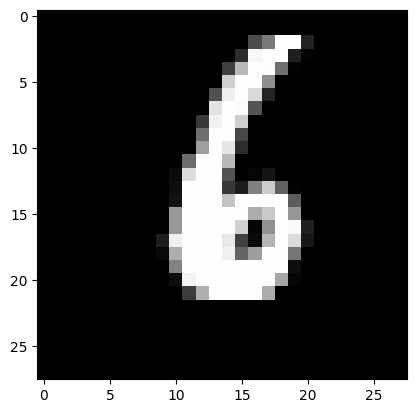

In [25]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

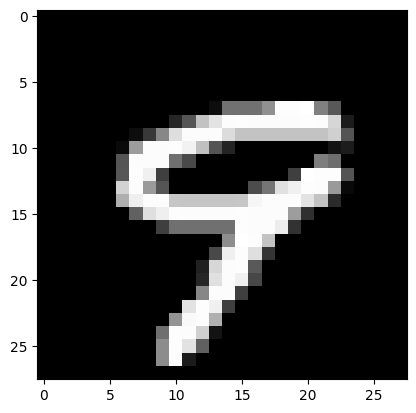

In [26]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [27]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_4 (UpSamplin  (None, 14, 14, 16)       

In [28]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 111s 464ms/step - loss: 0.1759 - val_loss: 0.0865
Epoch 2/20
235/235 [==============================] - 98s 418ms/step - loss: 0.0823 - val_loss: 0.0780
Epoch 3/20
235/235 [==============================] - 99s 424ms/step - loss: 0.0773 - val_loss: 0.0754
Epoch 4/20
235/235 [==============================] - 101s 430ms/step - loss: 0.0749 - val_loss: 0.0741
Epoch 5/20
235/235 [==============================] - 100s 427ms/step - loss: 0.0735 - val_loss: 0.0723
Epoch 6/20
235/235 [==============================] - 100s 425ms/step - loss: 0.0726 - val_loss: 0.0716
Epoch 7/20
235/235 [==============================] - 100s 425ms/step - loss: 0.0719 - val_loss: 0.0710
Epoch 8/20
235/235 [==============================] - 100s 424ms/step - loss: 0.0713 - val_loss: 0.0705
Epoch 9/20
235/235 [==============================] - 102s 431ms/step - loss: 0.0709 - val_loss: 0.0700
Epoch 10/20
235/235 [==============================] - 102s 433ms/

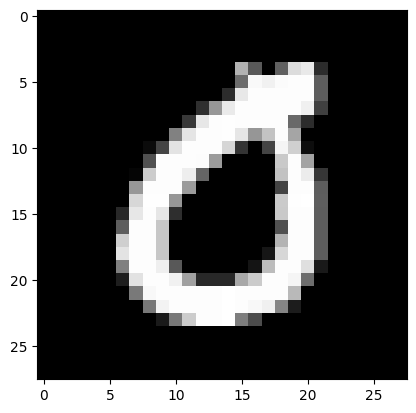

In [29]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [30]:
# predict the results from model (get compressed images)
pred = model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


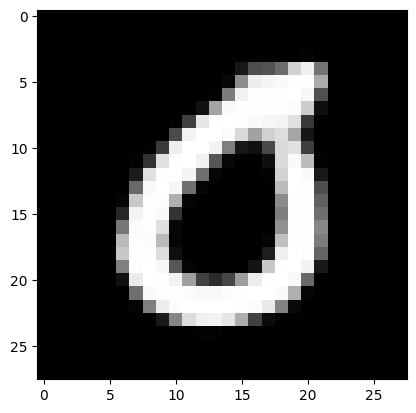

In [31]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

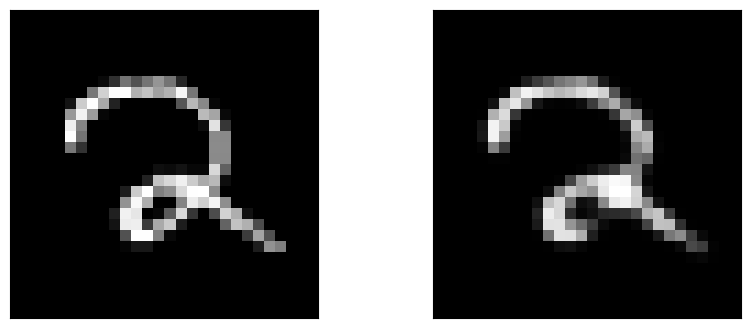

In [32]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()